# Setup

Clone repo, install dependencies and check PyTorch and GPU.

<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

In [ ]:
# モジュールを最新にする
! pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


# ここでランタイムを再起動

In [ ]:
# !git clone https://github.com/NikaMasa51/yolov5  # clone repo
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


# Download data

Download datasets

In [ ]:
!pwd

/content/yolov5


In [ ]:
import gdown

# a file
url = "https://drive.google.com/u/0/uc?id=1G0qsbEYMK6kbC9B9aRhkSrmyyeEJEeYC"
output1 = "../datasets.zip"
gdown.download(url, output1, quiet=False, fuzzy=True)
print("Download datasets.zip")
!7z x ../datasets.zip
!mv ./datasets ../
print("Extend datasets.zip")

Downloading...
From: https://drive.google.com/uc?id=1G0qsbEYMK6kbC9B9aRhkSrmyyeEJEeYC
To: /content/datasets.zip
100%|██████████| 3.09G/3.09G [00:39<00:00, 78.7MB/s]


Download datasets.zip

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../             1 file, 3090021145 bytes (2947 MiB)

Extracting archive: ../datasets.zip
--
Path = ../datasets.zip
Type = zip
Physical Size = 3090021145

  0%      0% 19 - ../datasets/GlobalWheat2020/ima . cd07-4edd-9075-f8e7481a043b.png                                                                             0% 44 - ../datasets/GlobalWheat2020/ima . 9f85-4a94-a5d1-f9bee39cbd90.png                                                                           

Download yaml file

In [ ]:
import gdown

# a file
url = "https://drive.google.com/file/d/1-ILg4BW5U2slRvEa2hPXXN7_KhqMMgm2/view?usp=sharing"
output1 = "./data/GlobalWheat2020_coco.yaml"
gdown.download(url, output1, quiet=False, fuzzy=True)
print("Download GlobalWheat2020_coco.yaml")

Downloading...
From: https://drive.google.com/uc?id=1-ILg4BW5U2slRvEa2hPXXN7_KhqMMgm2
To: /content/yolov5/data/GlobalWheat2020_coco.yaml
100%|██████████| 1.96k/1.96k [00:00<00:00, 3.27MB/s]

Download GlobalWheat2020_coco.yaml


Download runs(予め学習済みのweightを取得)

・Dataset images

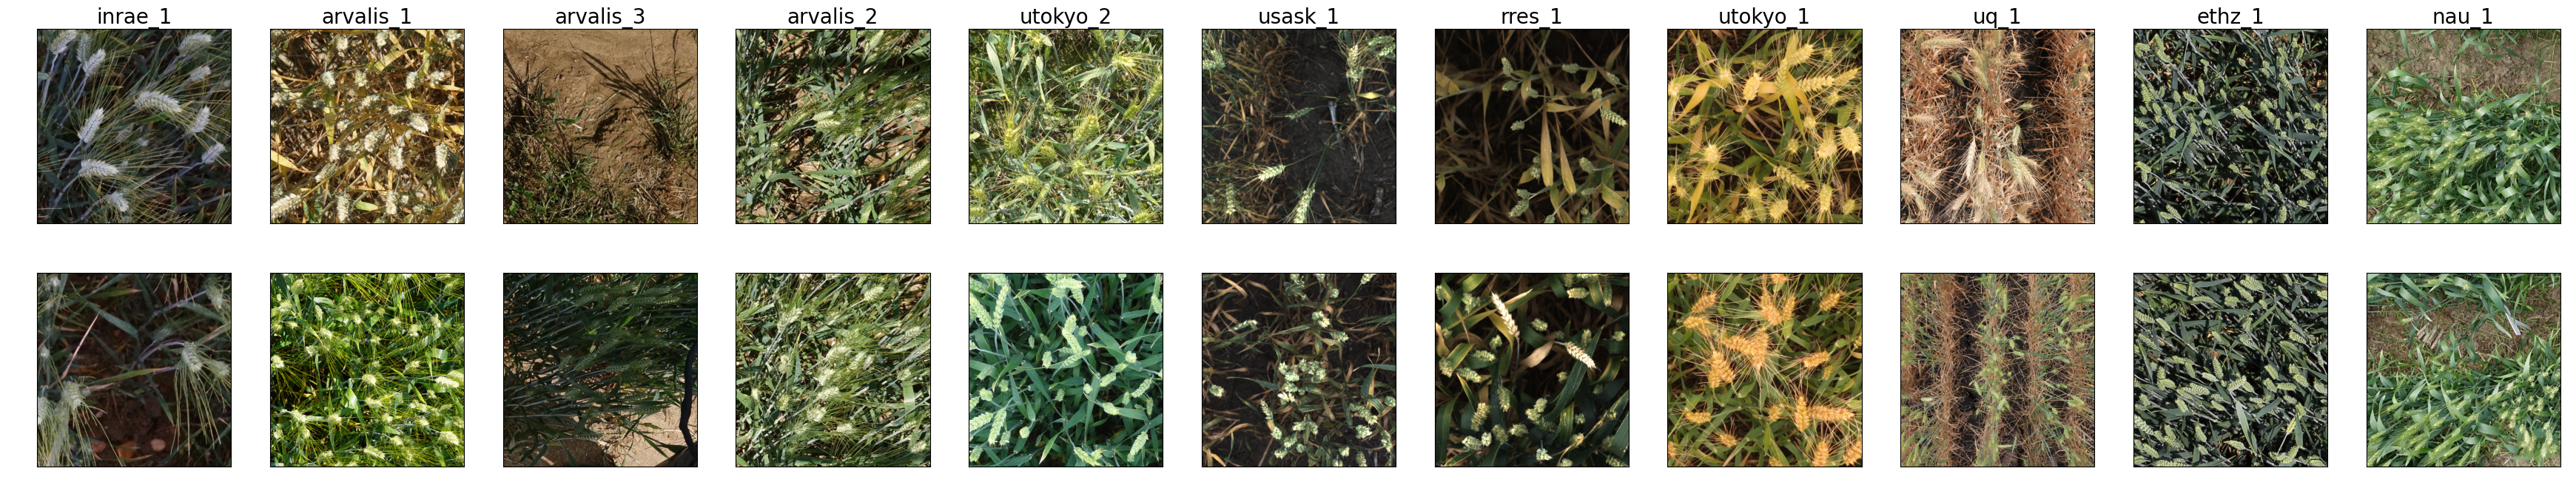

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

def show_weed():
  #　雑草名と生育状態をリストに定義
  wheat_names = ['arvalis_1', 'arvalis_2', 'arvalis_3', 'ethz_1', 'rres_1', 'inrae_1', 'usask_1', \
        'utokyo_1', 'utokyo_2', 'nau_1', 'uq_1']

  dir_path = '/content/datasets/GlobalWheat2020/images'
  dir_list = os.listdir(dir_path)

  #　リストの長さを足して表示枚数を確認
  hs = len(wheat_names)*2

  #　表示設定
  col=len(wheat_names)
  row=hs/col
  cols=col*4
  rows=row*4
  dpis = 100

  #　イメージの表示サイズ、解像度
  fig = plt.figure(figsize=(cols,rows),dpi=dpis)
  
  #　＊＊番目に指定
  pi=1

  #　イメージ表示
  for input_dir in dir_list:
    if input_dir=='.DS_Store':
      continue
    #　1段目
    img_path = os.path.join(dir_path, input_dir)
    img_list = os.listdir(img_path)
    plot_num = pi
    ax=fig.add_subplot(row, col, plot_num)
    ax.set_title(input_dir, fontsize=20)
    # if plot_num == 1:
    #   plt.ylabel(f'wheat{i}', fontsize=20) # y軸ラベル
    img = Image.open(os.path.join(img_path, img_list[1])) # indexを変更して別の画像を表示！！
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.imshow(img, cmap='gray')
    #　2段目
    img_path = os.path.join(dir_path, input_dir)
    img_list = os.listdir(img_path)
    plot_num2 = pi+11
    bx=fig.add_subplot(row, col, plot_num2)
    # bx.set_title(input_dir, fontsize=20, pad=0)
    # if plot_num2 == 11:
    #   plt.ylabel(weed_type[1], fontsize=20) # y軸ラベル
    img2 = Image.open(os.path.join(img_path, img_list[2]))
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.imshow(img2, cmap='gray')
    pi = pi+1
  fig.align_labels()

show_weed()

# Train Object Detection


In [ ]:
%cd /content/yolov5
!pwd

/content/yolov5
/content/yolov5


In [ ]:
!python train.py --batch 8 --weights yolov5x.pt --data GlobalWheat2020_coco.yaml --epochs 10 --cache --img 640 --project runs/train/GlobalWheat --name demo640_data100

train: weights=yolov5x.pt, cfg=, data=GlobalWheat2020_coco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train/GlobalWheat, name=demo640_data100, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, 

Large model(おまけ)

In [ ]:
# !python train.py --batch 8 --weights yolov5n6.pt --data GlobalWheat2020_coco.yaml --epochs 10 --cache --img 1280 --project runs/train/GlobalWheat --name demo

mAP @ [.5：.95]（mAP @ [.5,.95]と表示する人もいる）は、0.5から0.95までのさまざまなIoUしきい値での平均mAPを示す（0.05ごとに0.5、0.55、0.6、0.65、0.7、0.75、 0.8、0.85、0.9、0.95）。

# 1. Inference

In [ ]:
# !python detect.py --weights runs/train/GlobalWheat/demo/weights/best.pt --img 1280 --source ../datasets/GlobalWheat2020/images/usask_1 --project runs/detect/GlobalWheat --name demo

In [ ]:
!python val.py --iou-thres 0.999 --weights runs/train/GlobalWheat/demo640_data100/weights/best.pt --data GlobalWheat2020_coco.yaml --task test --project runs/val/GlobalWheat --name demo640_data100

val: data=/content/yolov5/data/GlobalWheat2020_coco.yaml, weights=['runs/train/GlobalWheat/demo640_data100/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.999, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val/GlobalWheat, name=demo640_data100, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
test: Scanning /content/datasets/GlobalWheat2020/labels/nau_1... 0 images, 1276 backgrounds, 0 corrupt: 100% 1276/1276 [00:10<00:00, 120.77it/s]
test: WARNING ⚠️ No labels found in /content/datasets/GlobalWheat2020/labels/nau_1.cache. See https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data
test: New cache created: /content/datasets/GlobalWheat2020/labels/nau_1.cache
     

# Perform inferencing

In [ ]:
from typing import List, Tuple

import matplotlib.patches as patches
import numpy as np
from PIL import Image

# boxをimageに表示
def add_bboxes_to_image(ax, image: np.ndarray,
                        bboxes: List[Tuple[int, int, int, int]],
                        labels: List[str] = None,
                        label_size: int = 10,
                        line_width: int = 2,
                        border_color=(0, 1, 0, 1),
                        height=640,
                        width=640) -> None:
    """
    Add bbox to ax

    :param image: dtype=np.uint8
    :param bbox: [(left, top, right, bottom)]
    :param label: List[str] or None
    :return: ax
    """
    # Display the image
    ax.imshow(image)

    if labels is None:
        labels = [None] * len(bboxes)

    for bbox, label in zip(bboxes, labels):
        # Add bounding box
        left, top, width_, height_ = bbox
        rect = patches.Rectangle((left, top), width_, height_,
                                 linewidth=line_width,
                                 edgecolor=border_color,
                                 facecolor='none')
        ax.add_patch(rect)

        # label
        if label:
            bbox_props = dict(boxstyle="square,pad=0",
                              linewidth=line_width, facecolor=border_color,
                              edgecolor=border_color)
            ax.text(left, top, label,
                    ha="left", va="bottom", rotation=0,
                    size=label_size, bbox=bbox_props)
    return ax

In [ ]:
import json

json_file = './runs/val/GlobalWheat/demo640_data100/best_predictions.json'

# read labelbox JSON output
with open(json_file, 'r', encoding='utf-8') as f:
    # lines = f.readlines()
    pred_data = json.load(f)

predicted_boxes_ = []
# print('uid', datarow.uid)
for row in pred_data:
    if row['image_id']=='00175657-c80c-4ce1-a2d7-7d89592ee892':
        predicted_boxes_.append(row['bbox'])


(1024, 1024, 3)
[[376.267, 362.42, 81.955, 137.045], [600.319, 369.249, 112.32, 127.142], [602.161, 372.83, 107.757, 121.937], [550.037, 42.627, 135.16, 154.884], [547.988, 37.413, 136.358, 165.369], [378.033, 363.684, 81.722, 137.135], [600.994, 374.042, 113.696, 119.115], [600.335, 373.296, 116.341, 120.719], [549.304, 40.568, 134.507, 158.88], [549.867, 38.419, 135.284, 163.271], [377.072, 363.307, 84.851, 136.764], [0.382, 42.844, 72.942, 93.149], [598.976, 772.73, 123.958, 104.152], [218.969, 666.251, 108.351, 103.504], [600.519, 372.211, 112.041, 123.167], [735.835, 3.966, 73.301, 73.924], [550.763, 38.367, 131.994, 163.369], [375.051, 361.06, 86.223, 138.387], [375.985, 366.7, 81.922, 132.974], [603.083, 371.927, 109.544, 122.661], [599.339, 374.469, 116.531, 119.124], [782.509, 463.038, 108.602, 92.051], [599.568, 373.923, 114.166, 119.309], [0.245, 42.615, 72.919, 92.974], [546.26, 39.877, 139.131, 157.082], [377.556, 364.374, 82.001, 134.011], [546.211, 42.333, 142.633, 152.9

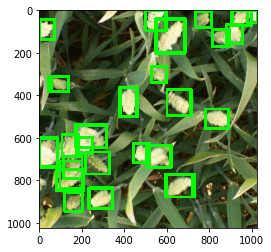

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt

image = np.array(Image.open('/content/datasets/GlobalWheat2020/images/utokyo_1/00175657-c80c-4ce1-a2d7-7d89592ee892.png'))
print(image.shape)
height, width = image.shape[:2]

bboxes = predicted_boxes_ # [left, top, w, h]

print(bboxes)
fig, ax = plt.subplots()
add_bboxes_to_image(ax, np.uint8(image), bboxes, height=height, width=width)
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

# Evolustion(おまけ)

In [ ]:
# !python train.py --batch 8 --weights yolov5n6.pt --data GlobalWheat2020_coco.yaml --epochs 10 --cache  --evolve --img 1280 --project runs/evolve/GlobalWheat2020 --name demo